In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/open-shopee-code-league-marketing-analytics/users.csv
/kaggle/input/open-shopee-code-league-marketing-analytics/sample_submission_0_1.csv
/kaggle/input/open-shopee-code-league-marketing-analytics/train.csv
/kaggle/input/open-shopee-code-league-marketing-analytics/test.csv


# Loading the data

In [2]:
train =  pd.read_csv('../input/open-shopee-code-league-marketing-analytics/train.csv')
users = pd.read_csv('../input/open-shopee-code-league-marketing-analytics/users.csv')
test = pd.read_csv('../input/open-shopee-code-league-marketing-analytics/test.csv')

# printing first five rows of the files
print('First five rows of training data:\n',train.head(),'\n')
print('First five rows of users data:\n',users.head(),'\n')
print('First five rows of test data:\n',test.head())

First five rows of training data:
    country_code                 grass_date  user_id  subject_line_length  \
0             4  2019-07-16 00:00:00+08:00       43                   44   
1             4  2019-07-16 00:00:00+08:00      102                   44   
2             6  2019-07-16 00:00:00+08:00      177                   49   
3             1  2019-07-16 00:00:00+08:00      184                   49   
4             6  2019-07-16 00:00:00+08:00      221                   49   

  last_open_day last_login_day last_checkout_day  open_count_last_10_days  \
0            19              6                18                        0   
1             9              4                 8                        2   
2            14              5                 5                        0   
3            49              9                53                        0   
4           227              6               221                        0   

   open_count_last_30_days  open_count_last_6

# Data Exploration


In [3]:
# check data info
train.info()
print('\n')
users.info()
print('\n')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 73539 non-null  int64 
 1   grass_date                   73539 non-null  object
 2   user_id                      73539 non-null  int64 
 3   subject_line_length          73539 non-null  int64 
 4   last_open_day                73539 non-null  object
 5   last_login_day               73539 non-null  object
 6   last_checkout_day            73539 non-null  object
 7   open_count_last_10_days      73539 non-null  int64 
 8   open_count_last_30_days      73539 non-null  int64 
 9   open_count_last_60_days      73539 non-null  int64 
 10  login_count_last_10_days     73539 non-null  int64 
 11  login_count_last_30_days     73539 non-null  int64 
 12  login_count_last_60_days     73539 non-null  int64 
 13  checkout_count_last_10_days  73

We noticed that the columns "last_open_day", "last_login_day", "last_checkout_day" are of object type when they are supposed to be of integer type. We'll investigate the reasons by looking at the unique values of these columns.

In [4]:
# Find the unique values in the columns "last_open_day", "last_login_day", "last_checkout_day" 

last_open_day_unique =  train["last_open_day"].unique()
display(np.sort(last_open_day_unique))

last_login_day_unique =  train["last_login_day"].unique()
display(np.sort(last_login_day_unique))

last_checkout_day_unique =  train["last_checkout_day"].unique()
display(np.sort(last_checkout_day_unique))

array(['1', '10', '100', '101', '102', '103', '104', '105', '106', '107',
       '108', '109', '11', '110', '111', '112', '113', '114', '115',
       '116', '117', '118', '119', '12', '120', '121', '122', '123',
       '124', '125', '126', '127', '128', '129', '13', '130', '131',
       '132', '133', '134', '135', '136', '137', '138', '139', '14',
       '140', '141', '142', '143', '144', '145', '146', '147', '148',
       '149', '15', '150', '151', '152', '153', '154', '155', '156',
       '157', '158', '159', '16', '160', '161', '162', '163', '164',
       '165', '166', '167', '168', '169', '17', '170', '171', '172',
       '173', '174', '175', '176', '177', '178', '179', '18', '180',
       '181', '182', '183', '184', '185', '186', '187', '188', '189',
       '19', '190', '191', '192', '193', '194', '195', '196', '197',
       '198', '199', '2', '20', '200', '201', '202', '203', '204', '205',
       '206', '207', '208', '209', '21', '210', '211', '212', '213',
       '214', '215', '

array(['0', '1', '10', '100', '1001', '1002', '101', '1011', '1013',
       '102', '1028', '103', '1037', '104', '1049', '105', '1051', '1052',
       '106', '107', '108', '1083', '109', '1091', '1097', '11', '110',
       '1100', '111', '1113', '1117', '1119', '112', '113', '1135', '114',
       '1140', '1148', '115', '1150', '1152', '116', '117', '118', '119',
       '12', '120', '121', '122', '123', '1231', '124', '125', '1251',
       '126', '1262', '127', '128', '1288', '129', '1291', '13', '130',
       '1305', '131', '132', '133', '1332', '134', '135', '1354', '1357',
       '136', '137', '138', '1380', '139', '1392', '1396', '14', '140',
       '141', '142', '143', '1434', '1437', '144', '1445', '145', '146',
       '147', '148', '149', '15', '150', '151', '152', '153', '154',
       '155', '156', '157', '158', '159', '16', '160', '161', '162',
       '163', '164', '165', '166', '167', '168', '169', '17', '170',
       '171', '172', '173', '174', '175', '176', '177', '178', '17

array(['1', '10', '100', '1000', '1003', '101', '1010', '1012', '1016',
       '102', '1022', '1024', '1026', '1027', '1028', '103', '1030',
       '1033', '1037', '1039', '104', '1040', '1042', '1046', '1047',
       '1049', '105', '1056', '106', '1063', '1066', '107', '1070',
       '1072', '1076', '1079', '108', '1082', '1085', '1087', '109',
       '1091', '1096', '11', '110', '1100', '1103', '1105', '1107', '111',
       '1110', '1114', '1116', '1118', '112', '1122', '1124', '1127',
       '1128', '113', '1130', '1132', '1138', '114', '1140', '1147',
       '115', '1153', '1158', '1159', '116', '1162', '1167', '1168',
       '1169', '117', '1179', '118', '1186', '119', '1193', '1199', '12',
       '120', '1201', '1203', '1206', '1209', '121', '1210', '122', '123',
       '1230', '124', '1244', '125', '1252', '126', '1260', '127', '1270',
       '1274', '1275', '128', '1281', '1283', '129', '13', '130', '1301',
       '1304', '131', '1313', '132', '1324', '133', '1336', '1337', '13

We find that there are string values among the integer values in the columns "last_open_day", "last_login_day", "last_checkout_day". As we cannot calculate anything with string values, we'll have to convert these values into numeric ones. A simple example is to encode it as binary feature.

In [5]:
# convert to binary features
train["ever_open"] = np.where(train["last_open_day"]!= 'Never open', 1, 0)
train["ever_login"] = np.where(train["last_login_day"]!= 'Never login', 1, 0)
train["ever_checkout"] = np.where(train["last_checkout_day"]!= 'Never checkout', 1, 0)
    
test["ever_open"] = np.where(test["last_open_day"]!= 'Never open', 1, 0)
test["ever_login"] = np.where(test["last_login_day"]!= 'Never login', 1, 0)
test["ever_checkout"] = np.where(test["last_checkout_day"]!= 'Never checkout', 1, 0)

In [6]:
train = train.drop(train[["last_open_day","last_login_day","last_checkout_day"]], axis=1)
test = test.drop(test[["last_open_day","last_login_day","last_checkout_day"]], axis=1)

# Check data type
display(train.dtypes)
display(test.dtypes)

country_code                    int64
grass_date                     object
user_id                         int64
subject_line_length             int64
open_count_last_10_days         int64
open_count_last_30_days         int64
open_count_last_60_days         int64
login_count_last_10_days        int64
login_count_last_30_days        int64
login_count_last_60_days        int64
checkout_count_last_10_days     int64
checkout_count_last_30_days     int64
checkout_count_last_60_days     int64
open_flag                       int64
row_id                          int64
ever_open                       int64
ever_login                      int64
ever_checkout                   int64
dtype: object

country_code                    int64
grass_date                     object
user_id                         int64
subject_line_length             int64
open_count_last_10_days         int64
open_count_last_30_days         int64
open_count_last_60_days         int64
login_count_last_10_days        int64
login_count_last_30_days        int64
login_count_last_60_days        int64
checkout_count_last_10_days     int64
checkout_count_last_30_days     int64
checkout_count_last_60_days     int64
row_id                          int64
ever_open                       int64
ever_login                      int64
ever_checkout                   int64
dtype: object

Next, we'll proceed to count the number of distinct users in the training, users, and test dataset.

In [7]:
# count the number of distinct users in the training, users, and test dataset
print("Number of distinct users in training data:", train['user_id'].nunique())
print("Number of distinct users in users data:", users['user_id'].nunique())
print("Number of distinct users in test data:", test['user_id'].nunique())

Number of distinct users in training data: 72845
Number of distinct users in users data: 127886
Number of distinct users in test data: 55970


We'll take a look at the duplicated user rows in the training dataset

In [8]:
# Select all duplicated rows based on user_id column
duplicateUser_ID  = pd.concat(g for _, g in train.groupby("user_id") if len(g) > 1)

print("Duplicated rows based on user_id column are:", duplicateUser_ID.head(20), sep='\n')

Duplicated rows based on user_id column are:
       country_code                 grass_date  user_id  subject_line_length  \
24420             1  2019-08-02 00:00:00+08:00      355                   46   
43570             1  2019-08-15 00:00:00+08:00      355                   33   
33644             3  2019-08-08 00:00:00+08:00      790                   52   
36761             3  2019-08-09 00:00:00+08:00      790                   58   
17184             2  2019-07-28 00:00:00+08:00      849                   33   
20756             2  2019-07-30 00:00:00+08:00      849                   36   
13408             1  2019-07-25 00:00:00+08:00      874                   58   
44888             1  2019-08-16 00:00:00+08:00      874                   47   
41583             3  2019-08-14 00:00:00+08:00     1187                   37   
57840             3  2019-08-24 00:00:00+08:00     1187                   25   
52073             1  2019-08-20 00:00:00+08:00     1524                   6

Based on the duplicated user rows, we can see that different marketing emails were repeatedly sent to these Shopee users over a certain period, and the user behaviour may vary each time a marketing email is sent.

# Features Extension
We'll extend the training and test dataset by merging it with the users information

In [9]:
# merge the training and test dataset with users dataset

train_extend = pd.merge(train, users, on='user_id')
test_extend = pd.merge(test, users, on='user_id')

# printing first five rows of the files
print('First five rows of extended training data:\n',train_extend.head(),'\n')
print('First five rows of extended test data:\n',test_extend.head())

First five rows of extended training data:
    country_code                 grass_date  user_id  subject_line_length  \
0             4  2019-07-16 00:00:00+08:00       43                   44   
1             4  2019-07-16 00:00:00+08:00      102                   44   
2             6  2019-07-16 00:00:00+08:00      177                   49   
3             1  2019-07-16 00:00:00+08:00      184                   49   
4             6  2019-07-16 00:00:00+08:00      221                   49   

   open_count_last_10_days  open_count_last_30_days  open_count_last_60_days  \
0                        0                        2                        4   
1                        2                        9                       17   
2                        0                        4                       12   
3                        0                        0                        1   
4                        0                        0                        0   

   login_count_las

In [10]:
# describe the data

print('Describe the extended training data:')
display(train_extend.describe())
print('Describe the extended test data:')
display(test_extend.describe())

Describe the extended training data:


,country_code,user_id,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,...,checkout_count_last_60_days,open_flag,row_id,ever_open,ever_login,ever_checkout,attr_1,attr_2,attr_3,age
count,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,...,73539.000000,73539.000000,73539.00000,73539.000000,73539.000000,73539.000000,45347.000000,73260.000000,73539.000000,45347.000000
mean,2.533159,63048.595358,43.656373,0.911829,2.780457,5.019364,8.382287,25.284053,49.010430,0.909898,...,5.420960,0.155781,36769.00000,0.897769,0.996206,0.770122,0.999757,0.997256,1.077863,31.445564
std,1.675251,36068.006037,11.219323,1.754052,4.570239,7.902313,13.424436,37.853189,71.819327,2.887416,...,13.980182,0.362650,21229.02506,0.302955,0.061478,0.420757,0.015573,0.052308,1.035252,11.797405
min,1.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000
25%,1.000000,31679.500000,34.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,18384.50000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,24.000000
50%,2.000000,63340.000000,43.000000,0.000000,1.000000,2.000000,3.000000,11.000000,22.000000,0.000000,...,1.000000,0.000000,36769.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000
75%,3.000000,94731.500000,52.000000,1.000000,3.000000,6.000000,12.000000,35.000000,69.000000,1.000000,...,6.000000,0.000000,55153.50000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,36.000000
max,7.000000,127925.000000,75.000000,31.000000,92.000000,135.000000,254.000000,735.000000,1260.000000,157.000000,...,783.000000,1.000000,73538.00000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,118.000000


Describe the extended test data:


,country_code,user_id,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id,ever_open,ever_login,ever_checkout,attr_1,attr_2,attr_3,age
count,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.00000,55970.000000,55970.000000,55970.000000,34737.000000,55802.000000,55970.000000,34737.000000
mean,2.835215,65049.007790,42.212703,0.774272,2.441880,5.323530,8.978899,26.289459,50.713882,1.124674,3.219385,5.933893,27984.50000,0.864410,0.996981,0.796266,0.999885,0.999032,1.085778,31.267409
std,1.728489,37934.945847,12.276136,1.752984,4.786883,9.053473,13.975840,38.572656,73.289199,3.500704,8.197445,14.233715,16157.29162,0.342356,0.054867,0.402777,0.010730,0.031093,1.035913,11.312572
min,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,32293.250000,35.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,13992.25000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,24.000000
50%,3.000000,64683.000000,41.000000,0.000000,0.000000,2.000000,4.000000,13.000000,25.000000,0.000000,1.000000,2.000000,27984.50000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000
75%,4.000000,97776.500000,48.000000,1.000000,3.000000,6.000000,13.000000,36.000000,70.000000,1.000000,3.000000,7.000000,41976.75000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,36.000000
max,7.000000,127922.000000,79.000000,30.000000,79.000000,120.000000,329.000000,746.000000,1300.000000,252.000000,404.000000,609.000000,55969.00000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,118.000000


* Over 75% of the recipients, has an average open rate equal to 0 (3rd Quantile: 0). Given that those who opens the email are significantly less, we are suspicious that even for indifferent recipients the click rate is probably not a good indicator about whether they will make a checkout during the campaign period.
* The median age of the recipients are 29 years old. Please note the minimum value for age, it's -17. Because this attribute represents age, it doesn’t make sense to have negative values.

* Almost majority of the users displays attr_1 and attr_2. This means that these variables will probably gives us minimal value when predicting email churn.

In [11]:
# Assuming that the negative values for age is due to data entry errors, we'll just keep its absolute values.
train_extend["age"] = abs(train_extend["age"])
test_extend["age"] = abs(test_extend["age"])


# Feature Selection
Unique identifiers such as 'row_id' and 'user_id' are unnecessary features which should be dropped. Some features such as 'domain' are not useful when it comes to predicting email churn, and they need to be dropped prior to modeling.

In [12]:
# Drop the unnecessary features
train_extend = train_extend.drop(train_extend[['user_id','row_id','domain']], axis=1)

test_dup = test_extend
test_extend = test_extend.drop(test_extend[['user_id','row_id','domain']], axis=1)


# Verify dropped features
print("Columns of training data:\n",train_extend.columns,"\n")
print("Columns of test data:\n",test_extend.columns)

Columns of training data:
 Index(['country_code', 'grass_date', 'subject_line_length',
       'open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days', 'open_flag', 'ever_open', 'ever_login',
       'ever_checkout', 'attr_1', 'attr_2', 'attr_3', 'age'],
      dtype='object') 

Columns of test data:
 Index(['country_code', 'grass_date', 'subject_line_length',
       'open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days', 'ever_open', 'ever_login',
       'ever_checkout', 'attr_1', 'attr_2', 'attr_3', 'age'],
      dtype='object')


### Check for correlation
A correlation plot is able to provide us with information about whether there is an underlying linear relationship between variables or not.

*Note: Highly correlated features can be dropped as they provide no additional information to the model*

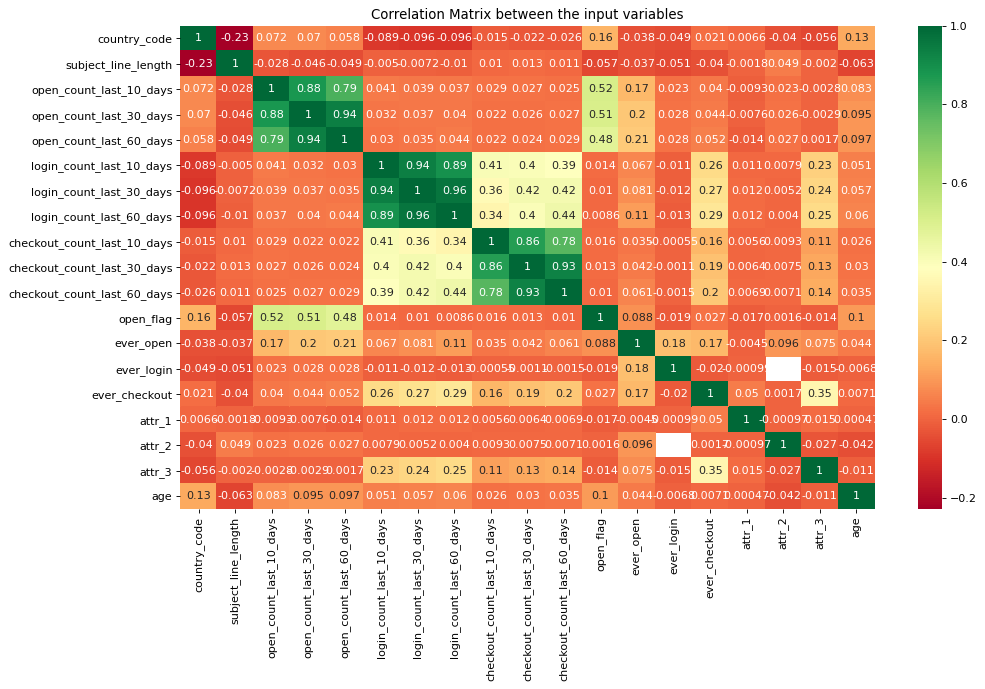

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,8), dpi=80)
sns.heatmap(train_extend.loc[:, 'country_code':'age'].corr(), cmap="RdYlGn",annot=True)
plt.title('Correlation Matrix between the input variables')
plt.show()

# Feature Engineering
We'll convert grass_date from date to weekdays

In [14]:
train_extend['grass_weekday'] = pd.to_datetime(train_extend['grass_date']).dt.dayofweek
test_extend['grass_weekday'] = pd.to_datetime(test_extend['grass_date']).dt.dayofweek

# Print the unique values of 'grass_weekday'
print(np.sort(train_extend['grass_weekday'].unique()))
print(np.sort(test_extend['grass_weekday'].unique()))


[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]


In [15]:
del train_extend['grass_date']
del test_extend['grass_date']

# Summarise missing values

In [16]:
# Total missing values for each feature
train_extend.isnull().sum()

country_code                       0
subject_line_length                0
open_count_last_10_days            0
open_count_last_30_days            0
open_count_last_60_days            0
login_count_last_10_days           0
login_count_last_30_days           0
login_count_last_60_days           0
checkout_count_last_10_days        0
checkout_count_last_30_days        0
checkout_count_last_60_days        0
open_flag                          0
ever_open                          0
ever_login                         0
ever_checkout                      0
attr_1                         28192
attr_2                           279
attr_3                             0
age                            28192
grass_weekday                      0
dtype: int64

### Identify the missingness type

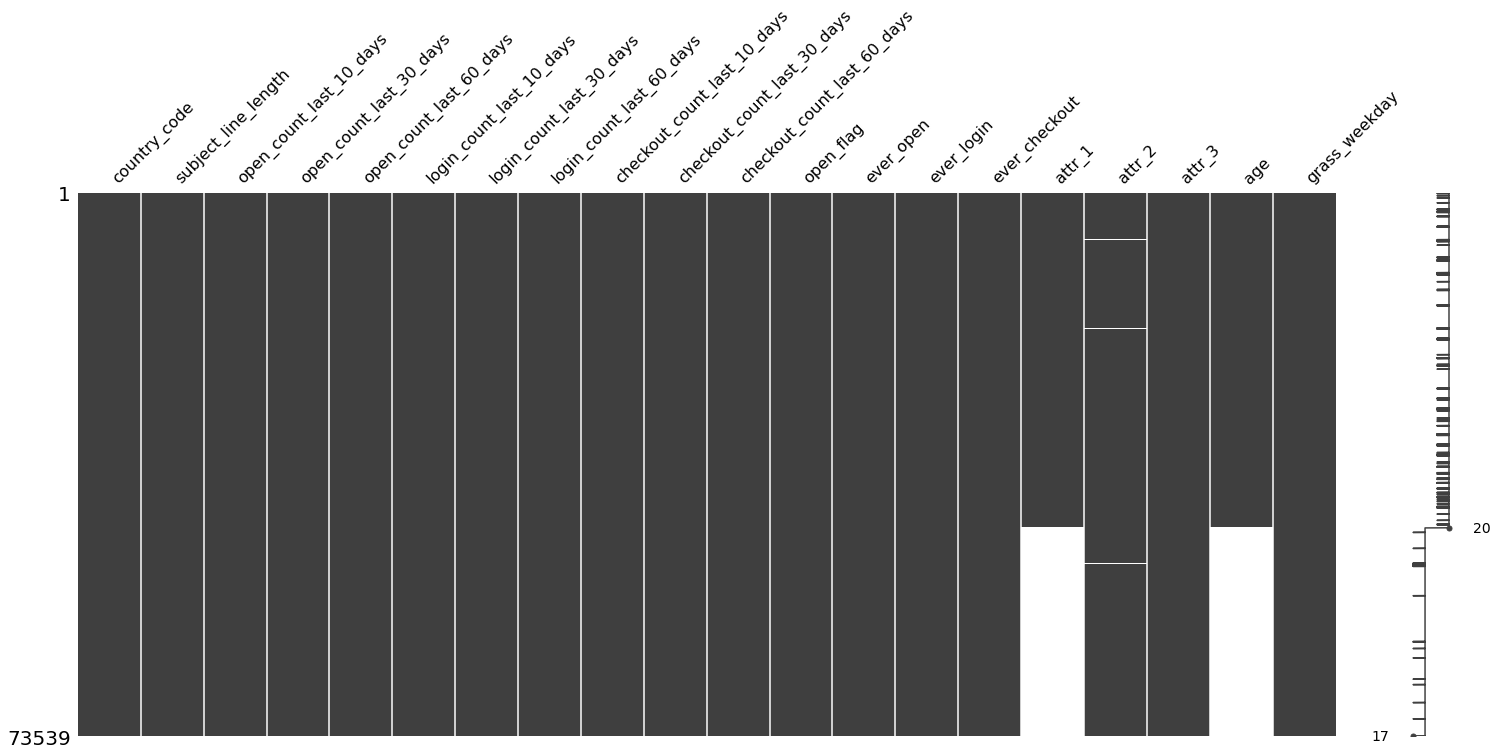

In [17]:
import missingno as msno

# Plot missingness matrix of train_extend
msno.matrix(train_extend.sort_values('age'))

# Show plot
plt.show()

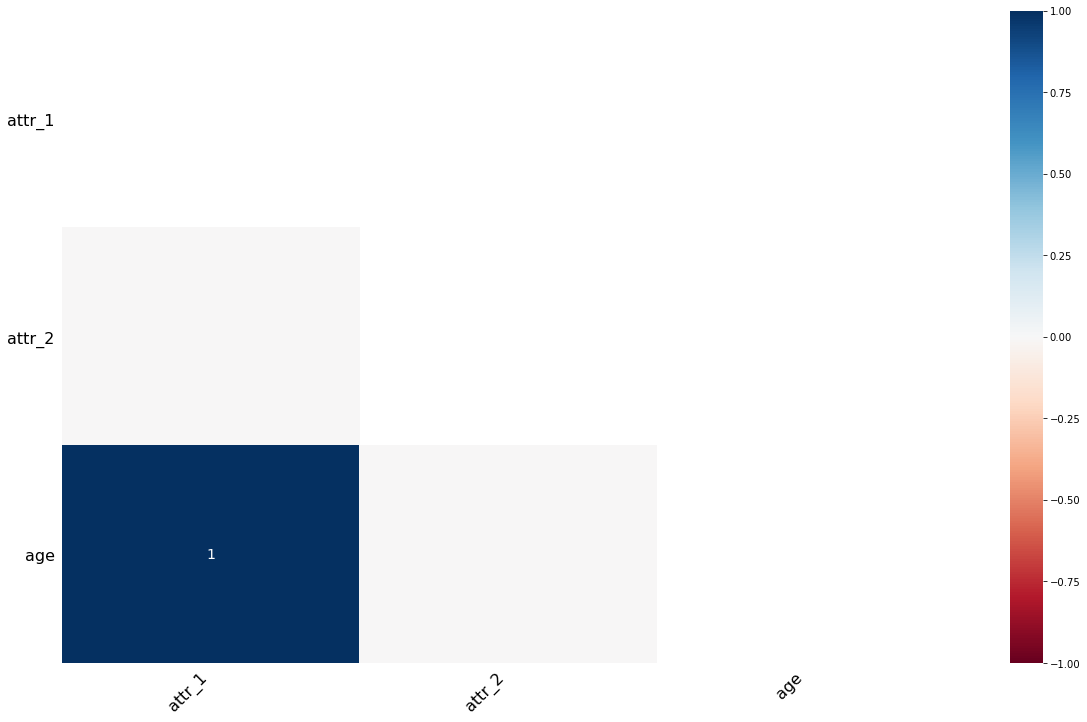

In [18]:
# Plot missingness heatmap of train_extend
msno.heatmap(train_extend)

# Show plot
plt.show()

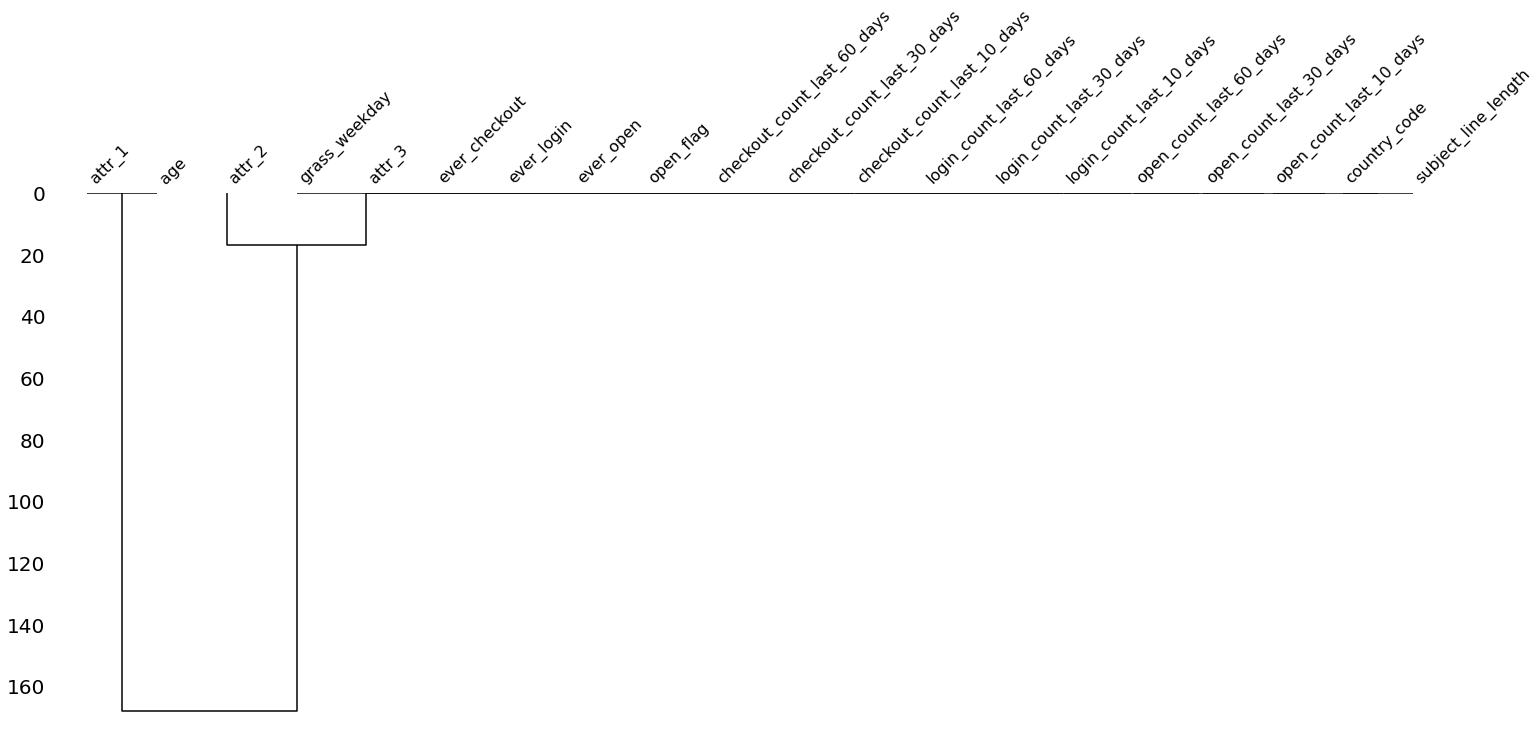

In [19]:
# Plot missingness dendrogram of train_extend
msno.dendrogram(train_extend)

# Show plot
plt.show()

Based on the plots above, we can deduce that attr_1 and age are Missing Not at Random (MNAR), while attr_2 is Missing Completely at Random (MCAR).

### Impute missing values
Instead of deleting rows with missing values, we'll replace the missing values by applying imputation techniques.

*Note: Listwise deletion (complete row deletion) should only be used when the values are MCAR*

In [20]:
# Applying MICE Imputation for non-categorical value

from fancyimpute import IterativeImputer

# Initialize IterativeImputer
MICE_imputer = IterativeImputer()

# Copy train_extend to train_extend_MICE
train_extend_MICE = train_extend.copy(deep=True)

# Impute using fit_tranform on train_extend
train_extend_MICE.iloc[:, :] = np.round(MICE_imputer.fit_transform(train_extend))

# Copy test_extend to test_extend_MICE
test_extend_MICE = test_extend.copy(deep=True)

# Impute using fit_tranform on test_extend
test_extend_MICE.iloc[:, :] = np.round(MICE_imputer.fit_transform(test_extend))

In [21]:
# convert columns type to int
train_extend_MICE = train_extend_MICE.astype(int)
test_extend_MICE = test_extend_MICE.astype(int)

### Check the statistics of the original columns, and MICE imputed ones

In [22]:
# Check for attr_1 column
display(train_extend["attr_1"].describe())
display(train_extend_MICE["attr_1"].describe())

count    45347.000000
mean         0.999757
std          0.015573
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: attr_1, dtype: float64

count    73539.000000
mean         0.999850
std          0.012229
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: attr_1, dtype: float64

In [23]:
# Check for attr_2 column
display(train_extend["attr_2"].describe())
display(train_extend_MICE["attr_2"].describe())

count    73260.000000
mean         0.997256
std          0.052308
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: attr_2, dtype: float64

count    73539.000000
mean         0.997267
std          0.052209
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: attr_2, dtype: float64

In [24]:
# Check for age column
display(train_extend["age"].describe())
display(train_extend_MICE["age"].describe())

count    45347.000000
mean        31.447020
std         11.793525
min          0.000000
25%         24.000000
50%         29.000000
75%         36.000000
max        118.000000
Name: age, dtype: float64

count    73539.000000
mean        31.613797
std          9.373445
min          0.000000
25%         27.000000
50%         31.000000
75%         34.000000
max        118.000000
Name: age, dtype: float64

# Splitting the dataset

In [25]:
from sklearn.model_selection import train_test_split

# Define X and y
y = train_extend_MICE["open_flag"].values
X = train_extend_MICE.drop(labels = ["open_flag"],axis = 1)

# # Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(58831, 19) (14708, 19) (58831,) (14708,)


# Logistic Regression & Model Testing
We'll use the most commonly used machine learning algorithm to build our first model.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score, classification_report, matthews_corrcoef


# train a logistic regression

log_reg = LogisticRegression(solver='lbfgs',max_iter=5000)
log_reg.fit(X_train, y_train)

y_pred_logreg = log_reg.predict(X_test)


print('MCC score test set: ', matthews_corrcoef(y_test, y_pred_logreg))

MCC score test set:  0.47819721330192255


Perhaps we could optimise this model, however there are a range of models to test that may perform better out-of-the-box. 

# Model Selection

In [27]:
# train random forest
from sklearn.ensemble import RandomForestClassifier

clf_rf  = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)


print('MCC score test set: ', matthews_corrcoef(y_test, y_pred_rf))

MCC score test set:  0.6596245171393812


In [28]:
from sklearn.svm import LinearSVC

# train SVM

clf_svm = LinearSVC(dual=False)
clf_svm.fit(X_train, y_train)

y_pred_svm = clf_svm.predict(X_test)

print('MCC score test set: ', matthews_corrcoef(y_test, y_pred_svm))

MCC score test set:  0.45547099437335675


In [29]:
# train GaussianNB

from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()

clf_gnb.fit(X_train, y_train)
y_pred_gnb = clf_gnb.predict(X_test)

print('MCC score test set: ', matthews_corrcoef(y_test, y_pred_gnb))

MCC score test set:  0.47729256567266254


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# train Gradient Boosting

clf_gb = GradientBoostingClassifier()

clf_gb.fit(X_train, y_train)
y_pred_gb = clf_gb.predict(X_test)

print('MCC score test set: ', matthews_corrcoef(y_test, y_pred_gb))

MCC score test set:  0.5656872154543454


In [31]:
# train XGBoost

from xgboost import XGBClassifier

clf_xgb = XGBClassifier()

clf_xgb.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_test)

print('MCC score test set: ', matthews_corrcoef(y_test, y_pred_xgb))

MCC score test set:  0.7147451124968691


From the above results, it is clear the XGBoost is the best model. We'll further improve the model by fine-tuning its parameters.

# Fine-tuning XGBoost Model

XGBoost has an in-build cross validation function that will help us to decide the parameters for the gradient boosting tree.

In [32]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label= y_train)
dtest = xgb.DMatrix(data=X_test, label= y_test)

num_boost_round=999

#Custom Matthews Correlation Coefficient

from numba import jit

@jit
def mcc(tp, tn, fp, fn):
    sup = tp * tn - fp * fn
    inf = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    if inf==0:
        return 0
    else:
        return sup / np.sqrt(inf)
    
@jit
def eval_mcc(y_true, y_prob, show=False):
    idx = np.argsort(y_prob)
    y_true_sort = y_true[idx]
    n = y_true.shape[0]
    nump = 1.0 * np.sum(y_true) # number of positive
    numn = n - nump # number of negative
    tp = nump
    tn = 0.0
    fp = numn
    fn = 0.0
    best_mcc = 0.0
    best_id = -1
    prev_proba = -1
    best_proba = -1
    mccs = np.zeros(n)
    for i in range(n):
        # all items with idx < i are predicted negative while others are predicted positive
        # only evaluate mcc when probability changes
        proba = y_prob[idx[i]]
        if proba != prev_proba:
            prev_proba = proba
            new_mcc = mcc(tp, tn, fp, fn)
            if new_mcc >= best_mcc:
                best_mcc = new_mcc
                best_id = i
                best_proba = proba
        mccs[i] = new_mcc
        if y_true_sort[i] == 1:
            tp -= 1.0
            fn += 1.0
        else:
            fp -= 1.0
            tn += 1.0
    if show:
        y_pred = (y_prob >= best_proba).astype(int)
        score = matthews_corrcoef(y_true, y_pred)
        print(score, best_mcc)
        plt.plot(mccs)
        return best_proba, best_mcc, y_pred
    else:
        return best_mcc
    
def mcc_eval(y_prob, dtrain):
    y_true = dtrain.get_label()
    best_mcc = eval_mcc(y_true, y_prob)
    return 'mcc', best_mcc


params = {
    # parameters that we're going to tune
    "eta": 0.05,
    "max_depth": 10,
    "min_child_weight": 5,
    "subsample": 0.8,
    "colsample_bytree": 1.0,
    # other parameters
    "objective": 'binary:logistic',
    #"eval_metric": 'auc',
    'disable_default_eval_metric': 1,
    "verbosity": 0
}

def fpreproc(dtrain, dtest, param):
    label = dtrain.get_label()
    ratio = float(np.sum(label == 0)) / np.sum(label == 1)
    params['scale_pos_weight'] = ratio
    return (dtrain, dtest, param)

cv_results = xgb.cv(params=params, dtrain=dtrain, num_boost_round=num_boost_round, nfold=5, seed=123, feval=mcc_eval, early_stopping_rounds= 10, fpreproc = fpreproc)

cv_results

<ipython-input-32-d46bf92232c8>:21: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "eval_mcc" failed type inference due to: Untyped global name 'matthews_corrcoef': cannot determine Numba type of <class 'function'>

File "<ipython-input-32-d46bf92232c8>", line 57:
def eval_mcc(y_true, y_prob, show=False):
    <source elided>
        y_pred = (y_prob >= best_proba).astype(int)
        score = matthews_corrcoef(y_true, y_pred)
        ^

  @jit
<ipython-input-32-d46bf92232c8>:21: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "eval_mcc" failed type inference due to: cannot determine Numba type of <class 'numba.dispatcher.LiftedLoop'>

File "<ipython-input-32-d46bf92232c8>", line 37:
def eval_mcc(y_true, y_prob, show=False):
    <source elided>
    mccs = np.zeros(n)
    for i in range(n):
    ^

  @jit
/opt/conda/lib/python3.7/site-packages/numba/object_mode_passes.py:178: NumbaWa

,train-mcc-mean,train-mcc-std,test-mcc-mean,test-mcc-std
0,0.651698,0.001962,0.605807,0.006093


In [33]:
print((cv_results["test-mcc-mean"]).max())

0.6058074


### Parameters max_depth and min_child_weight
* max_depth is the maximum number of nodes allowed from the root to the farthest leaf of a tree. Deeper trees can model more complex relationships by adding more nodes, but as we go deeper, splits become less relevant and are sometimes only due to noise, causing the model to overfit.
* min_child_weight is the minimum weight (or number of samples if all samples have a weight of 1) required in order to create a new node in the tree. A smaller min_child_weight allows the algorithm to create children that correspond to fewer samples, thus allowing for more complex trees, but again, more likely to overfit.

Thus, those parameters can be used to control the complexity of the trees. It is important to tune them together in order to find a good trade-off between model bias and variance

Let’s make a list containing all the combinations max_depth/min_child_weight that we want to try.

In [34]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(3,13)
    for min_child_weight in range(1,8)
]

Let's run the cross validation on each of those pairs. It can take some time....

In [35]:
max_mcc = float(0)
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=123,
        nfold=5,
        early_stopping_rounds=10,
        feval=mcc_eval
    )
    # Update best MCC
    mean_mcc = cv_results["test-mcc-mean"].max()
    boost_rounds = cv_results["test-mcc-mean"].argmin()
    print("\tMCC {} for {} rounds".format(mean_mcc, boost_rounds))
    if mean_mcc > max_mcc:
        max_mcc = mean_mcc
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MCC: {}".format(best_params[0], best_params[1], max_mcc))

CV with max_depth=3, min_child_weight=1
	MCC 0.4963082 for 0 rounds
CV with max_depth=3, min_child_weight=2
	MCC 0.4963082 for 0 rounds
CV with max_depth=3, min_child_weight=3
	MCC 0.4963082 for 0 rounds
CV with max_depth=3, min_child_weight=4
	MCC 0.4963082 for 0 rounds
CV with max_depth=3, min_child_weight=5
	MCC 0.4963082 for 0 rounds
CV with max_depth=3, min_child_weight=6
	MCC 0.4963082 for 0 rounds
CV with max_depth=3, min_child_weight=7
	MCC 0.4963082 for 0 rounds
CV with max_depth=4, min_child_weight=1
	MCC 0.508974 for 0 rounds
CV with max_depth=4, min_child_weight=2
	MCC 0.508974 for 0 rounds
CV with max_depth=4, min_child_weight=3
	MCC 0.508974 for 0 rounds
CV with max_depth=4, min_child_weight=4
	MCC 0.508974 for 0 rounds
CV with max_depth=4, min_child_weight=5
	MCC 0.508974 for 0 rounds
CV with max_depth=4, min_child_weight=6
	MCC 0.508974 for 0 rounds
CV with max_depth=4, min_child_weight=7
	MCC 0.508974 for 0 rounds
CV with max_depth=5, min_child_weight=1
	MCC 0.544959 f

We get the best score with a max_depth of 11, and min_child_weight of 5, so let's update our params.

In [36]:
params['max_depth'] = 11
params['min_child_weight'] = 5

### Parameter Gamma

In [37]:
# This can take some time…
max_mcc = float(0)
best_params = None

for gamma in [i/10. for i in range(0,5)]:
    print("CV with gamma={}".format(gamma))
    # We update our parameters
    params['gamma'] = gamma
 
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=123,
        nfold=5,
        early_stopping_rounds=10,
        feval=mcc_eval)
    
    # Update best score
    mean_mcc = cv_results["test-mcc-mean"].max()
    boost_rounds = cv_results["test-mcc-mean"].argmin()
    print("\tMCC {} for {} rounds\n".format(mean_mcc, boost_rounds))
    if mean_mcc > max_mcc:
        max_mcc = mean_mcc
        best_params = gamma
print("Best params: {}, MCC: {}".format(best_params, max_mcc))

CV with gamma=0.0
	MCC 0.6139056 for 0 rounds

CV with gamma=0.1
	MCC 0.6137224 for 0 rounds

CV with gamma=0.2
	MCC 0.6136570000000001 for 0 rounds

CV with gamma=0.3
	MCC 0.614539 for 0 rounds

CV with gamma=0.4
	MCC 0.6148895999999999 for 0 rounds

Best params: 0.4, MCC: 0.6148895999999999


In [38]:
params['gamma'] = 0.3

### Parameters subsample and colsample_bytree
* subsample corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
* colsample_bytree corresponds to the fraction of features (the columns) to use. By default it is set to 1 meaning that we will use all features.

In [39]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,11)]
    for colsample in [i/10. for i in range(5,11)]
]

In [40]:
max_mcc = float(0)
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=123,
        nfold=5,
        early_stopping_rounds=10,
        feval=mcc_eval
    )
    # Update best score
    mean_mcc = cv_results["test-mcc-mean"].max()
    boost_rounds = cv_results["test-mcc-mean"].argmin()
    print("\tMCC {} for {} rounds".format(mean_mcc, boost_rounds))
    if mean_mcc > max_mcc:
        max_mcc = mean_mcc
        best_params = (subsample,colsample)
print("Best params: {}, {}, MCC: {}".format(best_params[0], best_params[1], max_mcc))

CV with subsample=1.0, colsample=1.0
	MCC 0.6262506 for 0 rounds
CV with subsample=1.0, colsample=0.9
	MCC 0.5595846 for 0 rounds
CV with subsample=1.0, colsample=0.8
	MCC 0.5615698 for 0 rounds
CV with subsample=1.0, colsample=0.7
	MCC 0.4783259999999999 for 0 rounds
CV with subsample=1.0, colsample=0.6
	MCC 0.45421380000000006 for 0 rounds
CV with subsample=1.0, colsample=0.5
	MCC 0.42627380000000004 for 0 rounds
CV with subsample=0.9, colsample=1.0
	MCC 0.625122 for 0 rounds
CV with subsample=0.9, colsample=0.9
	MCC 0.562884 for 0 rounds
CV with subsample=0.9, colsample=0.8
	MCC 0.5617912 for 0 rounds
CV with subsample=0.9, colsample=0.7
	MCC 0.474568 for 0 rounds
CV with subsample=0.9, colsample=0.6
	MCC 0.45635339999999996 for 0 rounds
CV with subsample=0.9, colsample=0.5
	MCC 0.4293342 for 0 rounds
CV with subsample=0.8, colsample=1.0
	MCC 0.614539 for 0 rounds
CV with subsample=0.8, colsample=0.9
	MCC 0.5578366 for 0 rounds
CV with subsample=0.8, colsample=0.8
	MCC 0.55440480000

We get the best score with a subsample of 0.9, and colsample of 1.0, so let's update our params.

In [41]:
params['subsample'] = 0.9
params['colsample_bytree'] = 1.0

### Regularization Parameters
Applying regularization helps to reduce overfitting. We’ll try to tune ‘reg_alpha’ values here.

In [42]:
# This can take some time…
max_mcc = float(0)
best_params = None

for alpha in [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]:
    print("CV with alpha={}".format(alpha))
    # We update our parameters
    params['reg_alpha'] = alpha

    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=123,
        nfold=5,
        early_stopping_rounds=10,
        feval=mcc_eval)
    
    # Update best score
    mean_mcc = cv_results["test-mcc-mean"].max()
    boost_rounds = cv_results["test-mcc-mean"].argmin()
    print("\tMCC {} for {} rounds\n".format(mean_mcc, boost_rounds))
    if mean_mcc > max_mcc:
        max_mcc = mean_mcc
        best_params = alpha
print("Best params: {}, MCC: {}".format(best_params, max_mcc))

CV with alpha=0
	MCC 0.625122 for 0 rounds

CV with alpha=0.001
	MCC 0.625122 for 0 rounds

CV with alpha=0.005
	MCC 0.6256539999999999 for 0 rounds

CV with alpha=0.01
	MCC 0.6256539999999999 for 0 rounds

CV with alpha=0.05
	MCC 0.6257968 for 0 rounds

CV with alpha=0.1
	MCC 0.6256372000000001 for 0 rounds

CV with alpha=0.5
	MCC 0.626988 for 0 rounds

CV with alpha=1
	MCC 0.6317986 for 0 rounds

Best params: 1, MCC: 0.6317986


In [43]:
params['reg_alpha'] = 0.001

### Parameter ETA
The ETA parameter controls the learning rate. It corresponds to the shrinkage of the weights associated to features after each round, in other words it defines the amount of "correction" we make at each step.

In practice, having a lower eta makes our model more robust to overfitting thus, usually, the lower the learning rate, the best. But with a lower eta, we need more boosting rounds, which takes more time to train, sometimes for only marginal improvements. Let's try a couple of values here, and time them with the notebook command:

In [44]:
# This can take some time…
max_mcc = float(0)
best_params = None

for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time 
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=123,
        nfold=5,
        early_stopping_rounds=10,
        feval=mcc_eval)
    
    # Update best score
    mean_mcc = cv_results["test-mcc-mean"].max()
    boost_rounds = cv_results["test-mcc-mean"].argmin()
    print("\tMCC {} for {} rounds\n".format(mean_mcc, boost_rounds))
    if mean_mcc > max_mcc:
        max_mcc = mean_mcc
        best_params = eta
print("Best params: {}, MCC: {}".format(best_params, max_mcc))

CV with eta=0.3
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 12.2 µs
	MCC 0.625122 for 0 rounds

CV with eta=0.2
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
	MCC 0.625122 for 0 rounds

CV with eta=0.1
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs
	MCC 0.625122 for 0 rounds

CV with eta=0.05
CPU times: user 44 µs, sys: 1e+03 ns, total: 45 µs
Wall time: 9.54 µs
	MCC 0.625122 for 0 rounds

CV with eta=0.01
CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 9.78 µs
	MCC 0.625122 for 0 rounds

CV with eta=0.005
CPU times: user 44 µs, sys: 0 ns, total: 44 µs
Wall time: 10.3 µs
	MCC 0.625122 for 0 rounds

Best params: 0.3, MCC: 0.625122


In [45]:
params['eta'] = 0.3

# Results
Here is how our final dictionary of parameters looks like:

In [46]:
print(params)

{'eta': 0.3, 'max_depth': 11, 'min_child_weight': 5, 'subsample': 0.9, 'colsample_bytree': 1.0, 'objective': 'binary:logistic', 'disable_default_eval_metric': 1, 'verbosity': 0, 'scale_pos_weight': 5.471194830193868, 'gamma': 0.3, 'reg_alpha': 0.001}


Let’s train the tuned model and see how well it does on our test set.

In [47]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10,
    feval=mcc_eval,
    maximize = True
)

[0]	Test-mcc:0.64413
Will train until Test-mcc hasn't improved in 10 rounds.
[1]	Test-mcc:0.65381
[2]	Test-mcc:0.65903
[3]	Test-mcc:0.66404
[4]	Test-mcc:0.66662
[5]	Test-mcc:0.66882
[6]	Test-mcc:0.67043
[7]	Test-mcc:0.67350
[8]	Test-mcc:0.67634
[9]	Test-mcc:0.67586
[10]	Test-mcc:0.68042
[11]	Test-mcc:0.68155
[12]	Test-mcc:0.68173
[13]	Test-mcc:0.68250
[14]	Test-mcc:0.67998
[15]	Test-mcc:0.67968
[16]	Test-mcc:0.68393
[17]	Test-mcc:0.68396
[18]	Test-mcc:0.68512
[19]	Test-mcc:0.68579
[20]	Test-mcc:0.68750
[21]	Test-mcc:0.68868
[22]	Test-mcc:0.69184
[23]	Test-mcc:0.69361
[24]	Test-mcc:0.69300
[25]	Test-mcc:0.69406
[26]	Test-mcc:0.69413
[27]	Test-mcc:0.69454
[28]	Test-mcc:0.69464
[29]	Test-mcc:0.69437
[30]	Test-mcc:0.69249
[31]	Test-mcc:0.69227
[32]	Test-mcc:0.69103
[33]	Test-mcc:0.69238
[34]	Test-mcc:0.68996
[35]	Test-mcc:0.69200
[36]	Test-mcc:0.69249
[37]	Test-mcc:0.69253
[38]	Test-mcc:0.69153
Stopping. Best iteration:
[28]	Test-mcc:0.69464



# Saving the model

In [48]:
num_boost_round = model.best_iteration + 1

best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    feval=mcc_eval
)

[0]	Test-mcc:0.64413
[1]	Test-mcc:0.65381
[2]	Test-mcc:0.65903
[3]	Test-mcc:0.66404
[4]	Test-mcc:0.66662
[5]	Test-mcc:0.66882
[6]	Test-mcc:0.67043
[7]	Test-mcc:0.67350
[8]	Test-mcc:0.67634
[9]	Test-mcc:0.67586
[10]	Test-mcc:0.68042
[11]	Test-mcc:0.68155
[12]	Test-mcc:0.68173
[13]	Test-mcc:0.68250
[14]	Test-mcc:0.67998
[15]	Test-mcc:0.67968
[16]	Test-mcc:0.68393
[17]	Test-mcc:0.68396
[18]	Test-mcc:0.68512
[19]	Test-mcc:0.68579
[20]	Test-mcc:0.68750
[21]	Test-mcc:0.68868
[22]	Test-mcc:0.69184
[23]	Test-mcc:0.69361
[24]	Test-mcc:0.69300
[25]	Test-mcc:0.69406
[26]	Test-mcc:0.69413
[27]	Test-mcc:0.69454
[28]	Test-mcc:0.69464


In [49]:
best_model.save_model("my_model.model")

In [50]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")

# And use it for predictions.
pred_tuned_proba = loaded_model.predict(xgb.DMatrix(data=test_extend_MICE))

print(pred_tuned_proba)

[0.18696097 0.00937292 0.15368521 ... 0.00651337 0.01595574 0.79271543]


In [51]:
# look at the probability distribution

pd.DataFrame(np.unique(np.round(pred_tuned_proba,1), return_counts=True))

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
1,24312.0,12830.0,4746.0,2792.0,2079.0,1548.0,1312.0,1306.0,1369.0,1892.0,1784.0


In [52]:
# convert probability threshold

pred_tuned = np.where(pred_tuned_proba >= 0.5, 1, 0)
print(pred_tuned)

[0 0 0 ... 0 0 1]


In [53]:
print("% of users opening the email:", len(pred_tuned[pred_tuned == 1])/len(pred_tuned) * 100)
print("% of users not opening the email:", len(pred_tuned[pred_tuned == 0])/len(pred_tuned) * 100)

% of users opening the email: 15.029480078613544
% of users not opening the email: 84.97051992138645


# Submit Predictions

In [54]:
submission_tuned = pd.DataFrame({'row_id': test_dup['row_id'],
                           'open_flag': pred_tuned})

submission_tuned.to_csv("submission_xgboost_tuned.csv", index=False)

# Visualize Boosting Trees and Feature Importance

In [55]:
import matplotlib.pyplot as plt

# xgb.plot_tree(loaded_model)
xgb.to_graphviz(loaded_model)


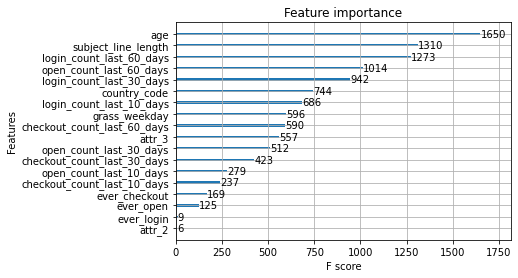

In [56]:
xgb.plot_importance(loaded_model)
plt.show()

As we can see the feature age has been given the highest importance score among all the features.